In [1]:
!pip install -q cohere sentence-transformers umap-learn altair > /dev/null

In [2]:
import cohere

import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import umap

from sklearn.metrics.pairwise import cosine_similarity

from sentence_transformers import SentenceTransformer

In [3]:
print('Pandas version:', pd.__version__)
print('NumPy version:', np.__version__)
print('Seaborn version:', sns.__version__)

Pandas version: 1.5.3
NumPy version: 1.22.4
Seaborn version: 0.12.2


In [4]:
words_ls = [
    "king",
    "queen",
    "soldier",
    "professor",
    "lecturer",
    "architect",
    "student",
    "grader",
    "driver",
    "bank",
    "conquerer",
    "fighter",
    "sword",
    "ring",
    "university",
    "teacher",
    "kindergarten",
    "institution",
    "hospital",
    "school"
]

## Embedding Models

Cohere: embed-english-v2.0 model generates embedding of size 4096

Sentence Transformer: all-MiniLM-L6-v2 model generates embeddings of size 384

## Cohere

In [5]:
import cohere

api_key = ''
co = cohere.Client(api_key)

In [6]:
words_embeddings_ls = np.asarray(co.embed(words_ls, 
                                          model='embed-english-v2.0').embeddings)
words_embeddings_ls.shape, words_embeddings_ls

((20, 4096),
 array([[ 1.6669922 , -0.01623535, -0.99560547, ..., -3.59375   ,
          0.43408203,  0.21508789],
        [ 1.8212891 ,  1.1972656 , -2.171875  , ..., -1.7792969 ,
          0.06469727, -1.2519531 ],
        [ 4.421875  , -0.12304688, -2.0390625 , ...,  0.08984375,
         -1.1699219 , -0.28930664],
        ...,
        [ 2.3046875 , -1.28125   ,  1.6533203 , ...,  0.43017578,
         -1.3066406 , -0.18920898],
        [ 1.0537109 , -1.2548828 , -0.25048828, ..., -0.90234375,
          0.5996094 ,  1.8740234 ],
        [ 0.61621094, -0.06237793, -0.27319336, ..., -0.8701172 ,
         -0.26367188,  0.33398438]]))

### Similarity: Dot Product

In [7]:
print("Similarity between words 1 and 2:", np.dot(words_embeddings_ls[0], words_embeddings_ls[1]))
print("Similarity between words 1 and 3:", np.dot(words_embeddings_ls[0], words_embeddings_ls[2]))
print("Similarity between words 2 and 3:", np.dot(words_embeddings_ls[1], words_embeddings_ls[2]))

Similarity between words 1 and 2: 3130.1629853303357
Similarity between words 1 and 3: 2402.1378265151943
Similarity between words 2 and 3: 2922.310352693946


In [8]:
print("Similarity between words 1 and 1:", np.dot(words_embeddings_ls[0], words_embeddings_ls[0]))
print("Similarity between words 2 and 2:", np.dot(words_embeddings_ls[1], words_embeddings_ls[1]))
print("Similarity between words 3 and 3:", np.dot(words_embeddings_ls[2], words_embeddings_ls[2]))

Similarity between words 1 and 1: 7433.391963056552
Similarity between words 2 and 2: 8252.285603840744
Similarity between words 3 and 3: 8350.571028445785


### Similarity: Cosine Similarity

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

print("Cosine similarity between words 1 and 2:", cosine_similarity([words_embeddings_ls[0]], [words_embeddings_ls[1]])[0][0])
print("Cosine similarity between words 1 and 3:", cosine_similarity([words_embeddings_ls[0]], [words_embeddings_ls[2]])[0][0])
print("Cosine similarity between words 2 and 3:", cosine_similarity([words_embeddings_ls[1]], [words_embeddings_ls[2]])[0][0])

Cosine similarity between words 1 and 2: 0.39965597444314716
Cosine similarity between words 1 and 3: 0.30489220280921886
Cosine similarity between words 2 and 3: 0.35203117431642705


In [10]:
from sklearn.metrics.pairwise import cosine_similarity

print("Cosine similarity between words 1 and 1:", cosine_similarity([words_embeddings_ls[0]], [words_embeddings_ls[0]])[0][0])
print("Cosine similarity between words 2 and 2:", cosine_similarity([words_embeddings_ls[1]], [words_embeddings_ls[1]])[0][0])
print("Cosine similarity between words 3 and 3:", cosine_similarity([words_embeddings_ls[2]], [words_embeddings_ls[2]])[0][0])

Cosine similarity between words 1 and 1: 1.0000000000000016
Cosine similarity between words 2 and 2: 1.0000000000000004
Cosine similarity between words 3 and 3: 1.0000000000000009


#### Visualization

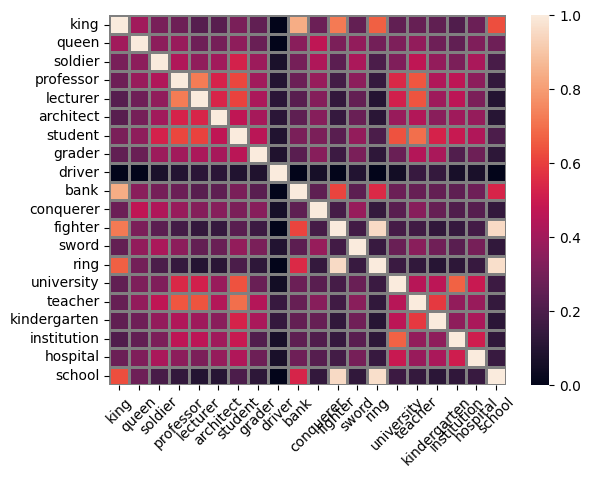

In [11]:
embeddings = [[words_embeddings_ls[i]] for i in range(len(words_embeddings_ls))]

dot_product_similarities = [[cosine_similarity(embeddings[i], embeddings[j])[0][0] 
                             for i in range(len(embeddings))] 
                            for j in range(len(embeddings))]
ax = sns.heatmap(dot_product_similarities, 
                 vmin=0, 
                 vmax=1,
                 linewidths=1, 
                 linecolor='grey',
                 xticklabels=words_ls,
                 yticklabels=words_ls,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Semantic Search

In [12]:
def embed_text(texts):
  output = co.embed(
                model="embed-english-v2.0",
                texts=texts)
  embedding = output.embeddings

  return embedding

In [13]:
words_df = pd.DataFrame({'words': words_ls})
words_df["words_embeddings"] = embed_text(words_df["words"].tolist())
words_df

,words,words_embeddings
0,king,"[1.6669922, -0.016235352, -0.99560547, -1.7666..."
1,queen,"[1.8212891, 1.1972656, -2.171875, 0.26171875, ..."
2,soldier,"[4.421875, -0.123046875, -2.0390625, 1.4951172..."
3,professor,"[1.5625, -1.3427734, 1.9697266, -0.5961914, 0...."
4,lecturer,"[0.5415039, 2.125, 3.0195312, -1.8476562, 0.79..."
5,architect,"[1.6308594, -0.65185547, 1.6953125, -1.1367188..."
6,student,"[0.87939453, 0.79248047, 1.5693359, -0.9252929..."
7,grader,"[1.4726562, 0.005126953, -1.8789062, -0.816406..."
8,driver,"[0.21691895, -0.7626953, -0.16247559, -0.21069..."
9,bank,"[1.7636719, 0.70410156, -0.6386719, -1.2568359..."


In [14]:
# Calculate cosine similarity

from sklearn.metrics.pairwise import cosine_similarity

def get_similarity(target, candidates):
  """
  Computes the similarity between a target text and a list of other texts
  Arguments:
    target(list[float]): the target text
    candidates(list[list[float]]): a list of other texts, or candidates
  Returns:
    sim(list[tuple]): candidate IDs and the similarity scores
  """
  # Turn list into array
  candidates = np.array(candidates)
  target = np.expand_dims(np.array(target),axis=0)

  # Calculate cosine similarity
  sim = cosine_similarity(target,candidates)
  sim = np.squeeze(sim).tolist()

  # Sort by descending order in similarity
  sim = list(enumerate(sim))
  sim = sorted(sim, key=lambda x:x[1], reverse=True)

  # Return similarity scores
  return sim

In [15]:
# Add a new query
new_query = "tutor"

# Get embeddings of the new query
new_query_embeds = embed_text([new_query])[0]

In [16]:
# Get the similarity between the new query and existing queries
similarity = get_similarity(new_query_embeds, words_embeddings_ls)
similarity[:5]

[(15, 0.6642129610980344),
 (6, 0.6321159676441694),
 (4, 0.6249166190723472),
 (3, 0.5572847190033742),
 (7, 0.4620909660181839)]

In [17]:
# Display the top 5 results
print(f"New query: {new_query}\n")

print("Similar queries:")
for idx,score in similarity[:5]:
  print(f"Similarity: {score:.2f};", words_df.iloc[idx]["words"])

New query: tutor

Similar queries:
Similarity: 0.66; teacher
Similarity: 0.63; student
Similarity: 0.62; lecturer
Similarity: 0.56; professor
Similarity: 0.46; grader


### Semantic Exploration: Visualizing Embeddings in 2D

In [18]:
# Reduce the embeddings' dimensions to 2 using UMAP
import umap
reducer = umap.UMAP(n_neighbors=len(words_ls)-1) 
umap_embeds = reducer.fit_transform(words_embeddings_ls)

# Add the 2 dimensions to the dataframe
words_df['x'] = umap_embeds[:,0]
words_df['y'] = umap_embeds[:,1]

In [19]:
# Plot the 2-dimension embeddings on a chart
chart = alt.Chart(words_df).mark_circle(size=500).encode(
  x=
  alt.X('x',
      scale=alt.Scale(zero=False),
      axis=alt.Axis(labels=False, ticks=False, domain=False)
  ),

  y=
  alt.Y('y',
      scale=alt.Scale(zero=False),
      axis=alt.Axis(labels=False, ticks=False, domain=False)
  ),
  
  tooltip=['words']
  )

text = chart.mark_text(align='left', dx=15, size=12, color='black'
          ).encode(text='words', color= alt.value('black'))

result = (chart + text).configure(background="#FDF7F0"
      ).properties(
      width=1000,
      height=700,
      title="2D Embeddings"
      )

result.interactive()

alt.LayerChart(...)

## Sentence Transformer

In [20]:
from sentence_transformers import SentenceTransformer

st_model = SentenceTransformer('all-MiniLM-L6-v2')

In [21]:
words_embeddings_ls = st_model.encode(words_ls)
words_embeddings_ls.shape, words_embeddings_ls

((20, 384),
 array([[-0.05959927,  0.0505124 , -0.06951009, ..., -0.03039854,
         -0.0010867 , -0.01592244],
        [ 0.035487  , -0.06560467, -0.0099349 , ..., -0.05388926,
         -0.03124186, -0.08696103],
        [-0.07152514,  0.01037204, -0.02709728, ..., -0.02312382,
         -0.0159644 ,  0.00311469],
        ...,
        [-0.00613615,  0.01561565, -0.04807351, ..., -0.04355937,
          0.06853441, -0.08883902],
        [ 0.00483566,  0.0370636 , -0.03827228, ...,  0.02753981,
          0.05275822, -0.0083467 ],
        [-0.01404429,  0.07605956,  0.01428938, ...,  0.01752145,
          0.01404699,  0.03910749]], dtype=float32))

### Similarity: Dot Product

In [22]:
print("Similarity between words 1 and 2:", np.dot(words_embeddings_ls[0], words_embeddings_ls[1]))
print("Similarity between words 1 and 3:", np.dot(words_embeddings_ls[0], words_embeddings_ls[2]))
print("Similarity between words 2 and 3:", np.dot(words_embeddings_ls[1], words_embeddings_ls[2]))

Similarity between words 1 and 2: 0.68071264
Similarity between words 1 and 3: 0.35787106
Similarity between words 2 and 3: 0.2915843


In [23]:
print("Similarity between words 1 and 1:", np.dot(words_embeddings_ls[0], words_embeddings_ls[0]))
print("Similarity between words 2 and 2:", np.dot(words_embeddings_ls[1], words_embeddings_ls[1]))
print("Similarity between words 3 and 3:", np.dot(words_embeddings_ls[2], words_embeddings_ls[2]))

Similarity between words 1 and 1: 0.9999999
Similarity between words 2 and 2: 1.0
Similarity between words 3 and 3: 1.0


### Similarity: Cosine Similarity

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

print("Cosine similarity between words 1 and 2:", cosine_similarity([words_embeddings_ls[0]], [words_embeddings_ls[1]])[0][0])
print("Cosine similarity between words 1 and 3:", cosine_similarity([words_embeddings_ls[0]], [words_embeddings_ls[2]])[0][0])
print("Cosine similarity between words 2 and 3:", cosine_similarity([words_embeddings_ls[1]], [words_embeddings_ls[2]])[0][0])

Cosine similarity between words 1 and 2: 0.68071276
Cosine similarity between words 1 and 3: 0.3578711
Cosine similarity between words 2 and 3: 0.2915843


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

print("Cosine similarity between words 1 and 1:", cosine_similarity([words_embeddings_ls[0]], [words_embeddings_ls[0]])[0][0])
print("Cosine similarity between words 2 and 2:", cosine_similarity([words_embeddings_ls[1]], [words_embeddings_ls[1]])[0][0])
print("Cosine similarity between words 3 and 3:", cosine_similarity([words_embeddings_ls[2]], [words_embeddings_ls[2]])[0][0])

Cosine similarity between words 1 and 1: 1.0000001
Cosine similarity between words 2 and 2: 1.0
Cosine similarity between words 3 and 3: 1.0


#### Visualization

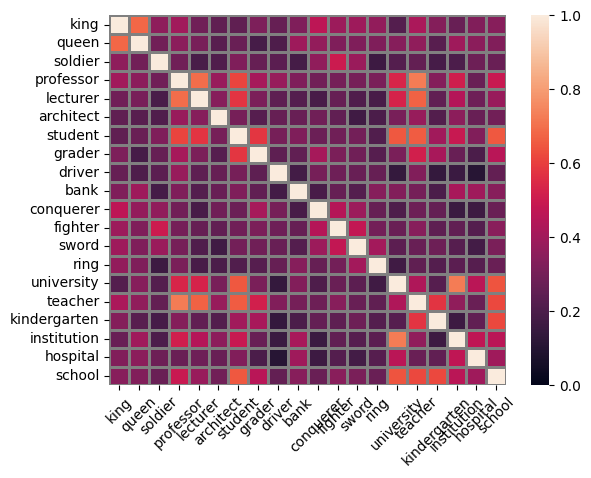

In [26]:
embeddings = [[words_embeddings_ls[i]] for i in range(len(words_embeddings_ls))]

dot_product_similarities = [[cosine_similarity(embeddings[i], embeddings[j])[0][0] 
                             for i in range(len(embeddings))] 
                            for j in range(len(embeddings))]
ax = sns.heatmap(dot_product_similarities, 
                 vmin=0, 
                 vmax=1,
                 linewidths=1, 
                 linecolor='grey',
                 xticklabels=words_ls,
                 yticklabels=words_ls,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#### Semantic Search

In [27]:
def embed_text(texts):
  embedding = SentenceTransformer('all-MiniLM-L6-v2').encode(texts).tolist()

  return embedding

In [28]:
words_df = pd.DataFrame({'words': words_ls})
words_df["words_embeddings"] = embed_text(words_df["words"].tolist())
words_df

,words,words_embeddings
0,king,"[-0.05959927290678024, 0.050512395799160004, -..."
1,queen,"[0.03548699617385864, -0.06560467183589935, -0..."
2,soldier,"[-0.07152514159679413, 0.010372042655944824, -..."
3,professor,"[-0.04654186591506004, 0.05815024673938751, -0..."
4,lecturer,"[-0.02557242289185524, 0.009689784608781338, -..."
5,architect,"[-0.03851071372628212, 0.07716397196054459, -0..."
6,student,"[-0.012675575911998749, 0.09457428753376007, 0..."
7,grader,"[-0.09967495501041412, 0.056422725319862366, -..."
8,driver,"[-0.02298632636666298, 0.05447081848978996, -0..."
9,bank,"[0.004872612655162811, 0.02502482943236828, -0..."


In [29]:
# Calculate cosine similarity

from sklearn.metrics.pairwise import cosine_similarity

def get_similarity(target, candidates):
  """
  Computes the similarity between a target text and a list of other texts
  Arguments:
    target(list[float]): the target text
    candidates(list[list[float]]): a list of other texts, or candidates
  Returns:
    sim(list[tuple]): candidate IDs and the similarity scores
  """
  # Turn list into array
  candidates = np.array(candidates)
  target = np.expand_dims(np.array(target),axis=0)

  # Calculate cosine similarity
  sim = cosine_similarity(target,candidates)
  sim = np.squeeze(sim).tolist()

  # Sort by descending order in similarity
  sim = list(enumerate(sim))
  sim = sorted(sim, key=lambda x:x[1], reverse=True)

  # Return similarity scores
  return sim

In [30]:
# Add a new query
new_query = "tutor"

# Get embeddings of the new query
new_query_embeds = embed_text([new_query])[0]

In [31]:
# Get the similarity between the new query and existing queries
similarity = get_similarity(new_query_embeds, words_embeddings_ls)
similarity[:5]

[(15, 0.6510644347158254),
 (4, 0.5919950016664896),
 (6, 0.5912162335666538),
 (3, 0.5190782667540429),
 (19, 0.4416725913936886)]

In [32]:
# Display the top 5 results
print(f"New query: {new_query}\n")

print("Similar queries:")
for idx,score in similarity[:5]:
  print(f"Similarity: {score:.2f};", words_df.iloc[idx]["words"])

New query: tutor

Similar queries:
Similarity: 0.65; teacher
Similarity: 0.59; lecturer
Similarity: 0.59; student
Similarity: 0.52; professor
Similarity: 0.44; school


### Semantic Exploration: Visualizing Embeddings in 2D

In [33]:
# Reduce the embeddings' dimensions to 2 using UMAP
import umap
reducer = umap.UMAP(n_neighbors=len(words_ls)-1) 
umap_embeds = reducer.fit_transform(words_embeddings_ls)

# Add the 2 dimensions to the dataframe
words_df['x'] = umap_embeds[:,0]
words_df['y'] = umap_embeds[:,1]

In [34]:
# Plot the 2-dimension embeddings on a chart
chart = alt.Chart(words_df).mark_circle(size=500).encode(
  x=
  alt.X('x',
      scale=alt.Scale(zero=False),
      axis=alt.Axis(labels=False, ticks=False, domain=False)
  ),

  y=
  alt.Y('y',
      scale=alt.Scale(zero=False),
      axis=alt.Axis(labels=False, ticks=False, domain=False)
  ),
  
  tooltip=['words']
  )

text = chart.mark_text(align='left', dx=15, size=12, color='black'
          ).encode(text='words', color= alt.value('black'))

result = (chart + text).configure(background="#FDF7F0"
      ).properties(
      width=1000,
      height=700,
      title="2D Embeddings"
      )

result.interactive()

alt.LayerChart(...)

## Dependencies

In [35]:
!pip install -q session-info

In [36]:
import session_info

session_info.show()